In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = input_data.read_data_sets('data', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


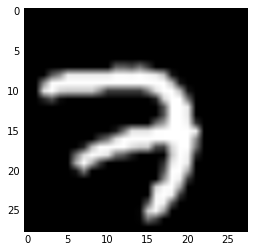

In [3]:
# visualize image data
h = mnist.train.images[0]

img = h.reshape((28, 28))
plt.imshow(img, cmap='gray')

In [4]:
np.argmax(mnist.train.labels[0], 0)

7

In [8]:
# define model

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
# training

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

init = tf.initialize_all_variables()

session = tf.Session()
session.run(init)

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    session.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    if i % 100 == 0:
        train_accuracy = accuracy.eval(session=session, feed_dict={x: batch_xs, y_: batch_ys})
        print('step {0}, training accuracy {1}'.format(i, train_accuracy))
    

step 0, training accuracy 0.47999998927116394
step 100, training accuracy 0.9599999785423279
step 200, training accuracy 0.9700000286102295
step 300, training accuracy 0.9800000190734863
step 400, training accuracy 0.9100000262260437
step 500, training accuracy 0.9599999785423279
step 600, training accuracy 0.9399999976158142
step 700, training accuracy 0.9599999785423279
step 800, training accuracy 0.949999988079071
step 900, training accuracy 0.9599999785423279
step 1000, training accuracy 0.949999988079071
step 1100, training accuracy 0.9399999976158142
step 1200, training accuracy 0.9599999785423279
step 1300, training accuracy 0.9399999976158142
step 1400, training accuracy 0.9700000286102295
step 1500, training accuracy 0.9399999976158142
step 1600, training accuracy 0.9399999976158142
step 1700, training accuracy 0.9399999976158142
step 1800, training accuracy 0.9200000166893005
step 1900, training accuracy 0.9200000166893005
step 2000, training accuracy 0.9800000190734863
step 

In [10]:
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9093


In [ ]:
W_out = W.eval(session=session)

In [ ]:
img = W_out.transpose()[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

In [ ]:
y_out = session.run(y, feed_dict={x: mnist.test.images})
y_out.shape